In [1]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from __future__ import print_function
import warnings
import tensorflow as tf
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import GlobalAveragePooling2D
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras import backend as k
from keras.applications.imagenet_utils import decode_predictions
from keras.applications.imagenet_utils import preprocess_input
from keras_applications.imagenet_utils import _obtain_input_shape
from keras.utils.layer_utils import get_source_inputs


In [2]:
IMAGE_SIZE = [128,128]
train_path = 'train'
valid_path = 'test'

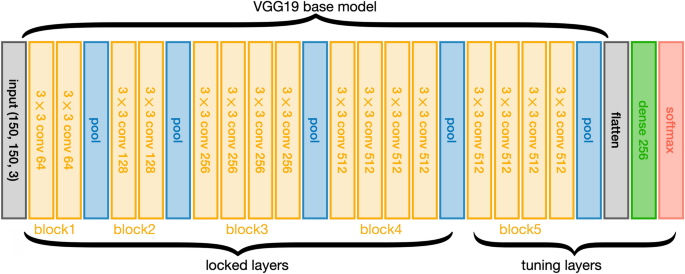

In [3]:
def createModel (input_tensor =None, classes = 2):
    img_rows,img_cols= 128,128
    img_channels = 3
    img_dim = (img_rows,img_cols,img_channels)
    img_input = Input(shape =img_dim)
    
    #block 1
    x = Conv2D(64,(3,3), activation ='relu', padding ='same', name='block1_conv1')(img_input)
    x = Conv2D(64,(3,3), activation ='relu', padding ='same', name='block1_conv2')(x)
    x = MaxPooling2D((2,2),strides =(2,2),name='block1_pool')(x)
    
    #block 2
    x = Conv2D(128,(3,3), activation ='relu', padding ='same', name='block2_conv1')(x)
    x = Conv2D(128,(3,3), activation ='relu', padding ='same', name='block2_conv2')(x)
    x = MaxPooling2D((2,2),strides =(2,2),name='block2_pool')(x)
    
    #block 3
    x = Conv2D(256,(3,3), activation ='relu', padding ='same', name='block3_conv1')(x)
    x = Conv2D(256,(3,3), activation ='relu', padding ='same', name='block3_conv2')(x)
    x = Conv2D(256,(3,3), activation ='relu', padding ='same', name='block3_conv3')(x)
    x = Conv2D(256,(3,3), activation ='relu', padding ='same', name='block3_conv4')(x)
    x = MaxPooling2D((2,2),strides =(2,2),name='block3_pool')(x)
    
    #block 4
    x = Conv2D(512,(3,3), activation ='relu', padding ='same', name='block4_conv1')(x)
    x = Conv2D(512,(3,3), activation ='relu', padding ='same', name='block4_conv2')(x)
    x = Conv2D(512,(3,3), activation ='relu', padding ='same', name='block4_conv3')(x)
    x = Conv2D(512,(3,3), activation ='relu', padding ='same', name='block4_conv4')(x)
    x = MaxPooling2D((2,2),strides =(2,2),name='block4_pool')(x)
    
    #block 5
    x = Conv2D(512,(3,3), activation ='relu', padding ='same', name='block5_conv1')(x)
    x = Conv2D(512,(3,3), activation ='relu', padding ='same', name='block5_conv2')(x)
    x = Conv2D(512,(3,3), activation ='relu', padding ='same', name='block5_conv3')(x)
    x = Conv2D(512,(3,3), activation ='relu', padding ='same', name='block5_conv4')(x)
    x = MaxPooling2D((2,2),strides =(2,2),name='block5_pool')(x)
    
    #classification block
    x = Flatten(name ='flatten')(x)
    x = Dense(4096,activation = 'relu', name ='fc1')(x)
    x = Dense(4096,activation = 'relu', name ='fc2')(x)
    x = Dense(2, activation ='softmax', name ='predictions')(x)
    
    # create model
    model = Model(inputs = img_input, outputs = x, name ='VGGdemo')
    return model

model = createModel(classes = 2)

In [4]:
# view the summary of the model
model.summary()

Model: "VGGdemo"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [5]:
# tell the model what cost and optimization method to use
opt = tf.keras.optimizers.Adam(learning_rate=1e-6)
model.compile(optimizer=opt,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
train_path = "C:/Users/Asish_NITT/Desktop/BOOKS/Projects/Mini_Project/train"
test_path = "C:/Users/Asish_NITT/Desktop/BOOKS/Projects/Mini_Project/test"
val_path = "C:/Users/Asish_NITT/Desktop/BOOKS/Projects/Mini_Project/validation"

In [8]:
import os
import cv2
x_train = []
for folder in os.listdir(train_path):
    sub_path = train_path +"/" + folder
    for img in os.listdir(sub_path):
        image_path = sub_path + "/" + img
        img_arr = cv2.imread(image_path)
        img_arr = cv2.resize(img_arr,(128,128))
        x_train.append(img_arr)
        
x_test = []
sub_path = test_path
for img in os.listdir(test_path):
    image_path = sub_path + "/" + img
    img_arr = cv2.imread(image_path)
    img_arr = cv2.resize(img_arr,(128,128))
    x_test.append(img_arr)

x_val = []
for folder in os.listdir(val_path):
    sub_path = val_path + "/" + folder
    for img in os.listdir(sub_path):
        image_path = sub_path + "/" + img
        img_arr = cv2.imread(image_path)
        img_arr = cv2.resize(img_arr, (128,128))
        x_val.append(img_arr)
        
print(len(x_train))
print(len(x_test))
print(len(x_val))

1908
24
60


In [9]:
train_x = np.array(x_train)
test_x = np.array(x_test)
val_x = np.array(x_val)

In [10]:
train_x = train_x/255.0
test_x = test_x/255.0
val_x = val_x/255.0

In [12]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
training_set = train_datagen.flow_from_directory('train',
                                                 target_size = (128,128),
                                                 batch_size = 32,
                                                 class_mode = 'sparse')

test_set = test_datagen.flow_from_directory('test',
                                            target_size = (128,128),
                                            batch_size = 32,
                                            class_mode = 'sparse',
                                            classes=['.'])

val_set = val_datagen.flow_from_directory(val_path,
                                            target_size = (128, 128),
                                            batch_size = 32,
                                            class_mode = 'sparse')

Found 1908 images belonging to 2 classes.
Found 24 images belonging to 1 classes.
Found 60 images belonging to 2 classes.


In [14]:
train_y = training_set.classes
test_y = test_set.classes
val_y = val_set.classes
print(train_y)

[0 0 0 ... 1 1 1]


In [15]:
training_set.class_indices

{'0_normal': 0, '1_broken_tree': 1}

In [16]:
train_y.shape, test_y.shape, val_y.shape

((1908,), (24,), (60,))

In [17]:
# fit the model
history = model.fit(
  training_set,
  validation_data=(val_x, val_y),
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  shuffle = True
)

Epoch 1/15
60/60 [==============================] - 1135s 19s/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6929 - val_accuracy: 0.5000
Epoch 2/15
60/60 [==============================] - 1132s 19s/step - loss: 0.6922 - accuracy: 0.5257 - val_loss: 0.6918 - val_accuracy: 0.5500
Epoch 3/15
60/60 [==============================] - 1125s 19s/step - loss: 0.6882 - accuracy: 0.5377 - val_loss: 0.6846 - val_accuracy: 0.5667
Epoch 4/15
60/60 [==============================] - 1123s 19s/step - loss: 0.6661 - accuracy: 0.6295 - val_loss: 0.6510 - val_accuracy: 0.6667
Epoch 5/15
60/60 [==============================] - 1123s 19s/step - loss: 0.5860 - accuracy: 0.7799 - val_loss: 0.5504 - val_accuracy: 0.7667
Epoch 6/15
60/60 [==============================] - 1124s 19s/step - loss: 0.4293 - accuracy: 0.8381 - val_loss: 0.3570 - val_accuracy: 0.8500
Epoch 7/15
60/60 [==============================] - 1165s 19s/step - loss: 0.3041 - accuracy: 0.8852 - val_loss: 0.2515 - val_accuracy: 0.9000

In [18]:
model.save('modelExp.h5')

In [2]:
import tensorflow as tf
new_model=tf.keras.models.load_model('modelExp.h5')

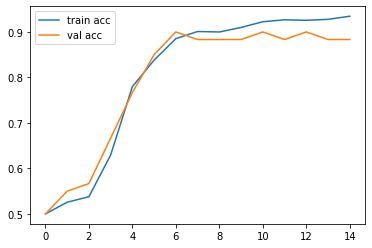

In [20]:
# accuracies
plt.plot(history.history['accuracy'], label = 'train acc')
plt.plot(history.history['val_accuracy'], label = 'val acc')
plt.legend()
plt.savefig('vgg-acc-rps-1.png')
plt.show()

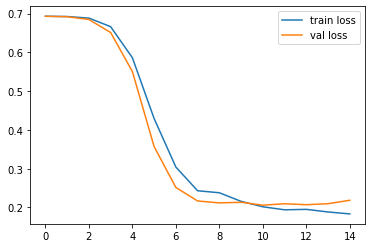

In [21]:
# loss
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.savefig('vgg-loss-rps-1.png')
plt.show()



########################################################################################


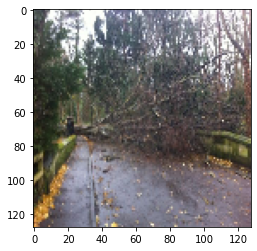

[[1. 0.]]
      Prediction : Normal Road 


########################################################################################


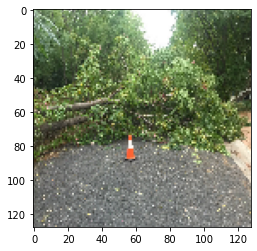

[[0. 1.]]
      Prediction : Broken Tree 


########################################################################################


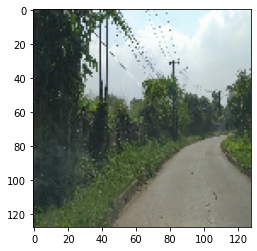

[[1. 0.]]
      Prediction : Normal Road 


########################################################################################


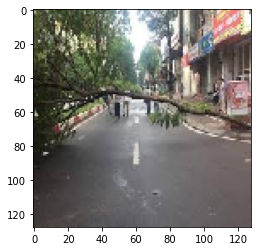

[[1. 0.]]
      Prediction : Normal Road 


########################################################################################


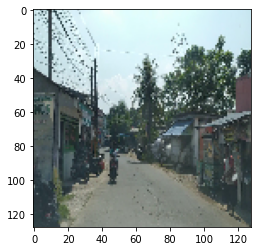

[[1. 0.]]
      Prediction : Normal Road 


########################################################################################


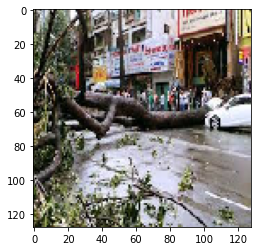

[[0. 1.]]
      Prediction : Broken Tree 


########################################################################################


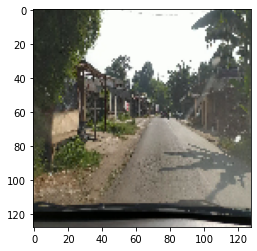

[[1. 0.]]
      Prediction : Normal Road 


########################################################################################


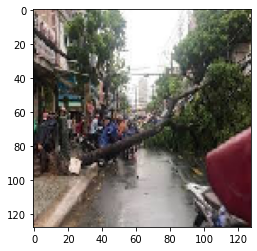

[[0. 1.]]
      Prediction : Broken Tree 


########################################################################################


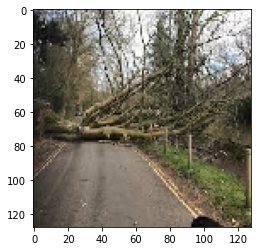

[[1. 0.]]
      Prediction : Normal Road 


########################################################################################


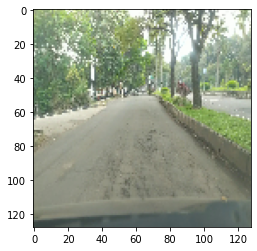

[[1. 0.]]
      Prediction : Normal Road 


########################################################################################


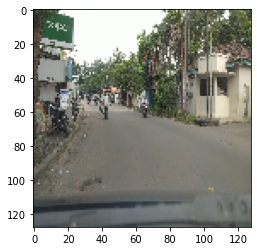

[[1. 0.]]
      Prediction : Normal Road 


########################################################################################


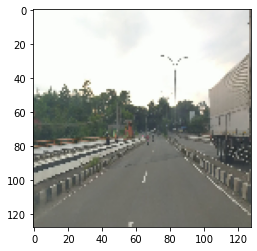

[[1. 0.]]
      Prediction : Normal Road 


########################################################################################


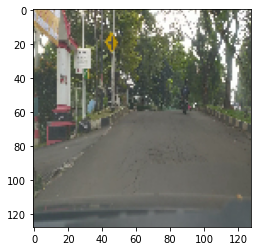

[[1. 0.]]
      Prediction : Normal Road 


########################################################################################


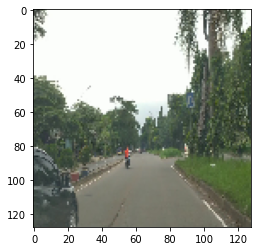

[[1. 0.]]
      Prediction : Normal Road 


########################################################################################


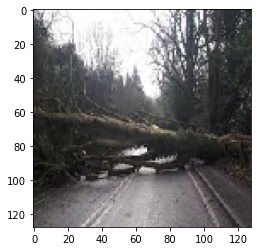

[[0. 1.]]
      Prediction : Broken Tree 


########################################################################################


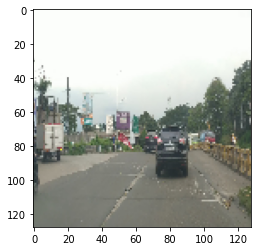

[[1. 0.]]
      Prediction : Normal Road 


########################################################################################


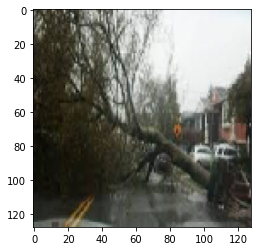

[[1. 0.]]
      Prediction : Normal Road 


########################################################################################


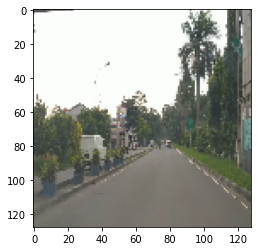

[[1. 0.]]
      Prediction : Normal Road 


########################################################################################


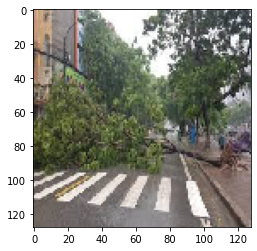

[[0. 1.]]
      Prediction : Broken Tree 


########################################################################################


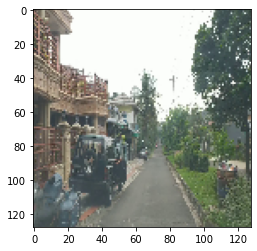

[[1. 0.]]
      Prediction : Normal Road 


########################################################################################


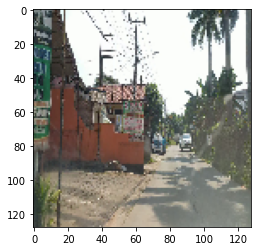

[[1. 0.]]
      Prediction : Normal Road 


########################################################################################


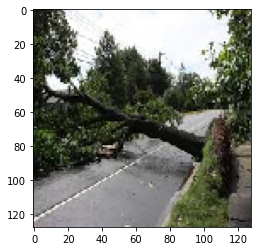

[[0. 1.]]
      Prediction : Broken Tree 


########################################################################################


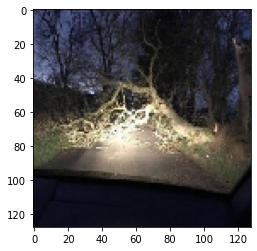

[[0. 1.]]
      Prediction : Broken Tree 


########################################################################################


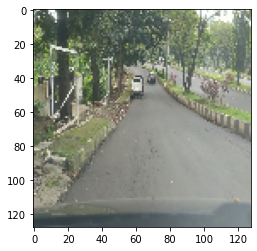

[[1. 0.]]
      Prediction : Normal Road 


In [3]:
import os
dir_path = 'test'
for i in os.listdir(dir_path):
    print("\n\n########################################################################################")
    img = image.load_img(dir_path+'/'+i,target_size=(128,128))
    plt.imshow(img)
    plt.show()
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    value = new_model.predict(images)
    print(value)
    if value[0][0]>value[0][1]:
        print("      Prediction : Normal Road ")
    else:
        print("      Prediction : Broken Tree ")